In [1]:
# first import the necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score, f1_score,classification_report,confusion_matrix, accuracy_score

In [2]:
df=pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## inspecting the dataset at a surface level.

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [116]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [117]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [118]:
df.sample()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
628,5,128,80,0,0,34.6,0.144,45,0


In [119]:
df.shape

(768, 9)

In [9]:
df.size

6912

In [11]:
# What are the columns and What they belong to and How they are described?
# check the columns name:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Since, most of the columns data types are integer while two of them are float. It is okay so, we don't need changes.

In [13]:
# check the info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Looking at the above info function, We can't find any null values present in the whole columns.
But we can check whether they have zero values present in the columns. As in medical terms, we cannot 
let our Blood pressure is to be zero.So, we will check this.

In [14]:
df['BloodPressure'].min()

0

Yes, we have 0 in Blood Pressure. According to medical terminology, If the heart is stopped, blood pressure falls, but it does not fall to zero.
So, it should be handled carefully.

In [18]:
# Let's check other values too.
for i in df.columns:
    print(i,"minimum value is \t",df[i].min(),"\t","maximum is \t",df[i].max())

Pregnancies minimum value is 	 0 	 maximum is 	 17
Glucose minimum value is 	 0 	 maximum is 	 199
BloodPressure minimum value is 	 0 	 maximum is 	 122
SkinThickness minimum value is 	 0 	 maximum is 	 99
Insulin minimum value is 	 0 	 maximum is 	 846
BMI minimum value is 	 0.0 	 maximum is 	 67.1
DiabetesPedigreeFunction minimum value is 	 0.078 	 maximum is 	 2.42
Age minimum value is 	 21 	 maximum is 	 81
Outcome minimum value is 	 0 	 maximum is 	 1


So, Iam planning to replace zero to NaN values and fill it with mean, median and mode. Before starting this check the descriptive statistics of whole columns.

In [13]:
# check the descriptive statistics:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [20]:
# Minimum values is zero we have placed our theory above according to medical standards.

In [3]:
# filter whose values are zeros.
df_filtered = df[df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].eq(0).any(axis=1)]
df_filtered

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df[(df['Glucose'] == 0) | (df['BloodPressure'] == 0) | (df['SkinThickness'] == 0) | (df['Insulin'] == 0) | (df['BMI'] == 0)]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [18]:
# so, i replace the zero to nan values first.

In [5]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NAN)

In [133]:
# now check the null values present in the dataset.
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [24]:
# check the null values in the dataset:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,False,False,False
2,False,False,False,True,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,True,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,True,True,False,False,False,False


In [25]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<Axes: >

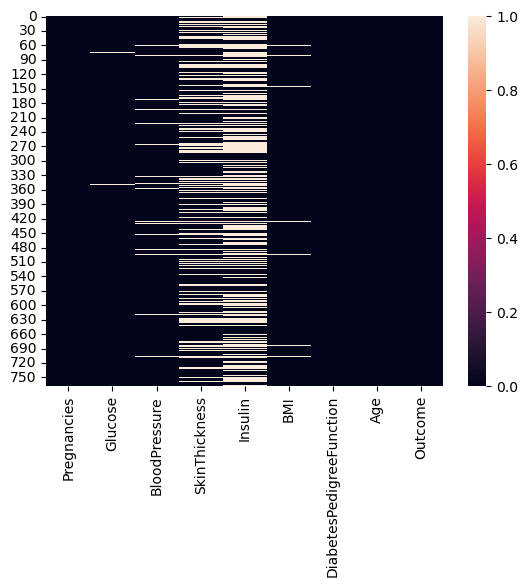

In [23]:
sns.heatmap(df.isnull())

In [6]:
# Now, need to fill the null values with mean, median and mode:
fill_values = {
    'Glucose': df['Glucose'].mean(),
    'BloodPressure': df['BloodPressure'].mean(),
    'SkinThickness': df['SkinThickness'].median(),
    'Insulin': df['Insulin'].median(),
    'BMI': df['BMI'].mean()
}

df.fillna(value=fill_values, inplace=True)

In [7]:
# check again:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

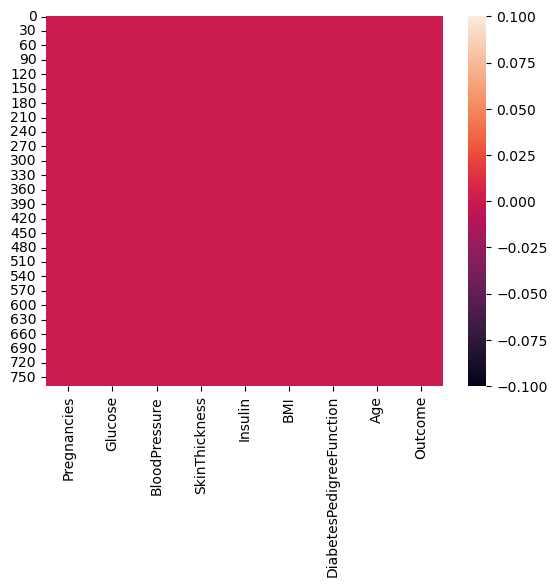

In [28]:
sns.heatmap(df.isnull())

In [27]:
# now its good to go.

In [29]:
# check the duplicated values also.
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

In [30]:
df.duplicated().sum()

0

In [30]:
# there are no duplicated values in the dataset.

In [31]:
# check now descriptive statistics:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# What is observed from the descriptive statistics:
* Pregnancies
Mean = 3.85, Std = 3.37 → Mean and std are close, indicating a moderate spread.
Outliers:
Max = 17 (Far from Q3 = 6, possible outlier).
Min = 0 (Could indicate women with no pregnancies).
Variability: Moderate, std is slightly less than mean
-------------
*  Glucose
Mean = 121.69, Std = 30.44 → High spread of values.
Outliers:
Max = 199 (Much higher than Q3 = 140.25).
Min = 44 (Very low compared to Q1 = 99.75).
Variability: High, as std is a large fraction of the mean.
----------------
* BloodPressure
Mean = 72.41, Std = 12.10 → Moderate spread.
Outliers:
Max = 122 (Higher than Q3 = 80).
Min = 24 (Extremely low, could be an error or an outlier).
Variability: Moderate, but possible data quality issues (low min).
----------------------
* SkinThickness
Mean = 29.11, Std = 8.79 → Normal spread.
Outliers:
Max = 99 (Much higher than Q3 = 32).
Min = 7 (Very low compared to Q1 = 25).
Variability: High, likely due to outliers.
----------------
* Insulin
Mean = 140.67, Std = 86.38 → Very high spread.
Outliers:
Max = 846 (Extremely high, strong outlier).
Min = 14 (Very low compared to Q1 = 121.5).
Variability: Very high, large standard deviation relative to mean.
----------------
* BMI
Mean = 32.46, Std = 6.88 → Moderate spread.
Outliers:
Max = 67.1 (Much higher than Q3 = 36.6).
Min = 18.2 (Lower but reasonable).
Variability: Moderate, but outliers affect the range.
----------------------
* DiabetesPedigreeFunction
Mean = 0.47, Std = 0.33 → Small values, but high variability relative to mean.
Outliers:
Max = 2.42 (Much higher than Q3 = 0.626).
Min = 0.078 (Very low).
Variability: High relative to the mean, indicating strong skewness.
-------------------------
* Age
Mean = 33.24, Std = 11.76 → Large spread of values.
Outliers:
Max = 81 (Significantly higher than Q3 = 41).
Min = 21 (Relatively close to Q1).
Variability: High due to a broad range of ages.

Text(0.5, 1.0, 'box plot to show outliers in individual columns')

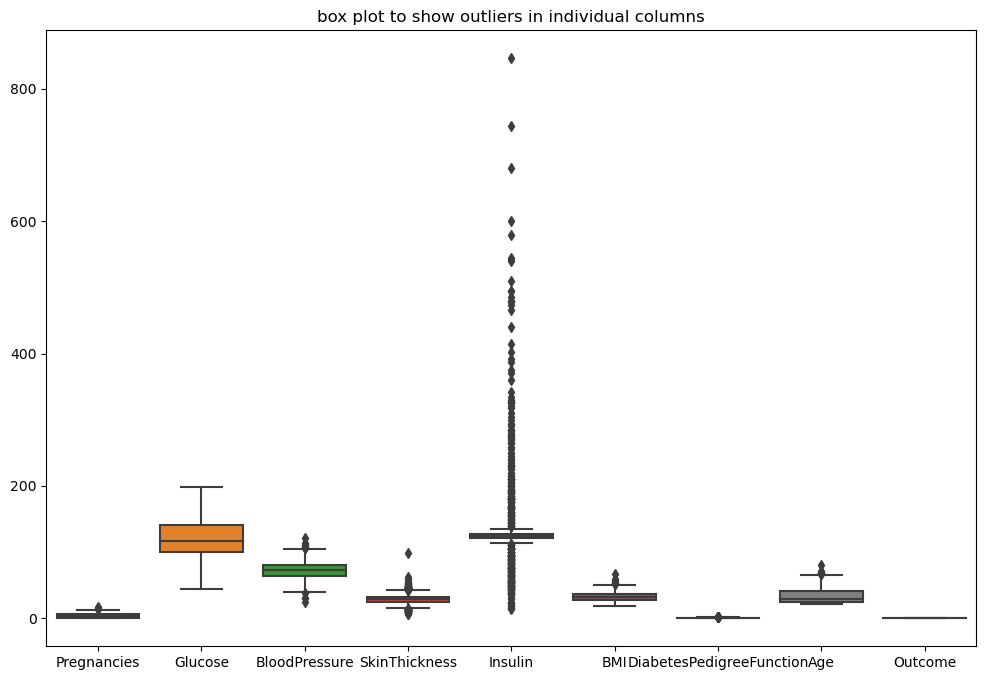

In [8]:
# checking the outliers in all the columns:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.title("box plot to show outliers in individual columns")

In [101]:
df['Pregnancies'].quantile(0.25)

1.0

In [96]:
df['Pregnancies'].quantile(0.50)

3.0

In [97]:
df['Pregnancies'].quantile(0.75)

6.0

In [98]:
df['Pregnancies'].median()

3.0

In [99]:
df['Pregnancies'].min()

0

In [100]:
df['Pregnancies'].max()

17

In [102]:
q1=df['Pregnancies'].quantile(0.25)
q3=df['Pregnancies'].quantile(0.75)
print(q1,q3)

1.0 6.0


In [103]:
iqr=q3-q1
iqr

5.0

In [104]:
df_lower=q1-1.5*iqr
df_upper=q3+1.5*iqr
print(df_lower,df_upper)

-6.5 13.5


In [9]:
# q1 = df['Pregnancies'].quantile(0.25)
# q3 = df['Pregnancies'].quantile(0.75)
# iqr = q3 - q1

# df_lower = q1 - 1.5 * iqr
# df_upper = q3 + 1.5 * iqr

# print(df_lower, df_upper)

# # Filtering the whole dataframe based on the IQR bounds for 'Pregnancies'
# df = df[(df['Pregnancies'] > df_lower) & (df['Pregnancies'] < df_upper)]

Text(0.5, 1.0, 'box plot to show outliers in individual columns')

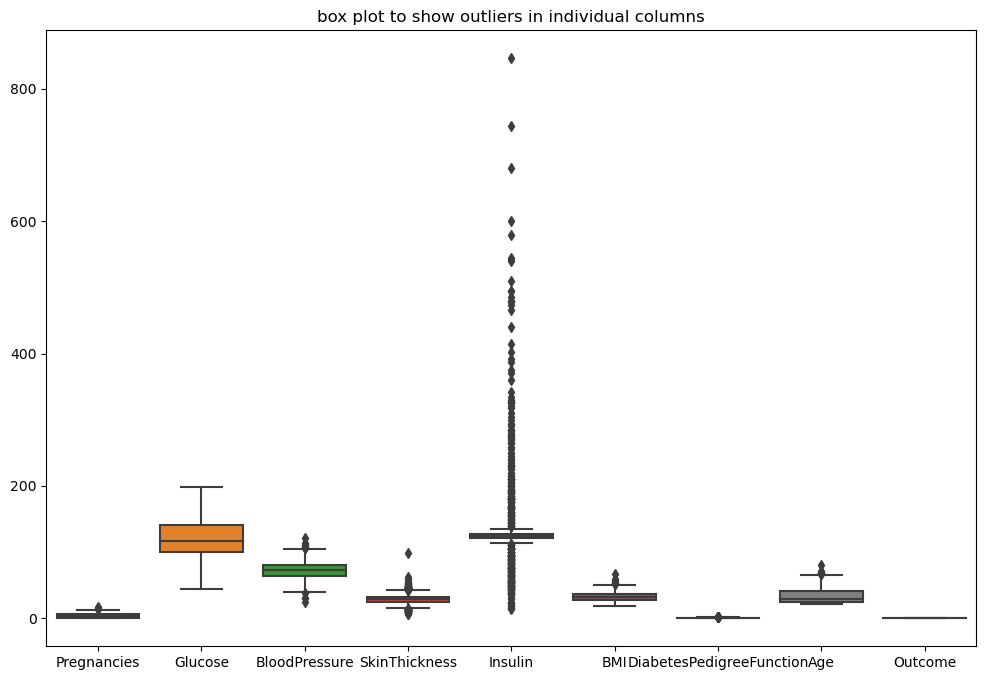

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.title("box plot to show outliers in individual columns")

In [114]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [11]:
# i want to remove outliers from remaining columns in one frame:
columns_outliers=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']
for col in df.columns:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-1.5*iqr
    upper_bound=q3+1.5*iqr
    df[col] = df[col].clip(lower_bound, upper_bound)

In [12]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,125.000,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,125.000,26.6,0.351,31.0,0
2,8.0,183.0,64.0,29.0,125.000,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,112.875,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,135.875,43.1,1.200,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,42.5,135.875,32.9,0.171,63.0,0
764,2.0,122.0,70.0,27.0,125.000,36.8,0.340,27.0,0
765,5.0,121.0,72.0,23.0,112.875,26.2,0.245,30.0,0
766,1.0,126.0,60.0,29.0,125.000,30.1,0.349,47.0,1


Text(0.5, 1.0, 'box plot to show outliers in individual columns')

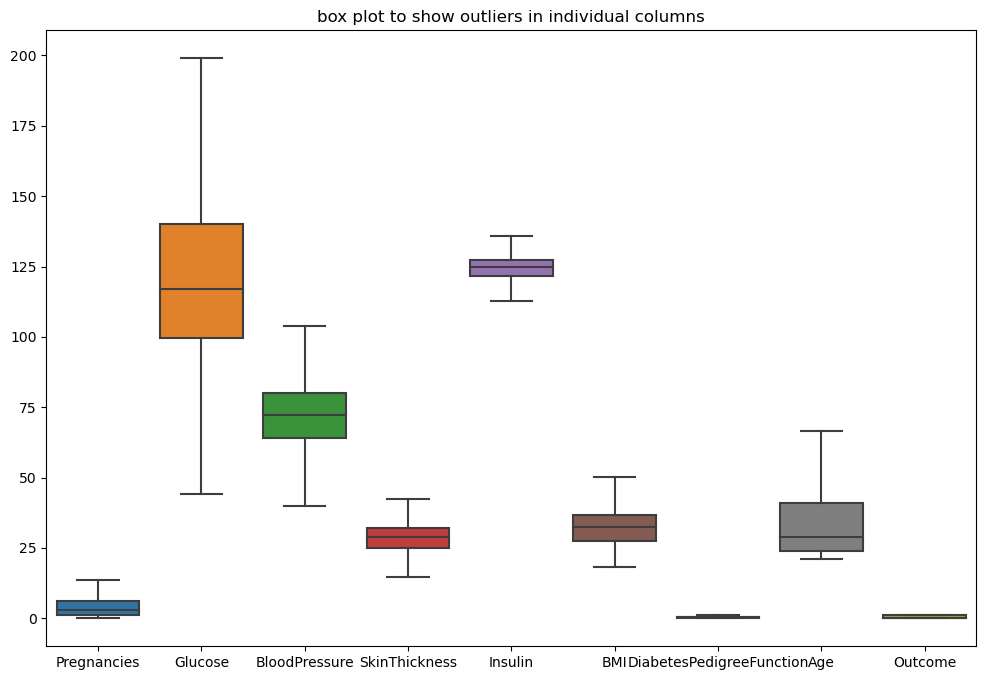

In [13]:
plt.figure(figsize=(12,8))
sns.boxplot(data=df)
plt.title("box plot to show outliers in individual columns")

## check individual columns:

In [33]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [54]:
df['Pregnancies'].min()

0.0

In [55]:
df['Pregnancies'].max()

13.5

In [56]:
df['Glucose'].min()

44.0

In [57]:
df['Glucose'].max()

199.0

In [58]:
df['BloodPressure'].min()

40.0

In [59]:
df['BloodPressure'].max()

104.0

In [60]:
df['SkinThickness'].min()

14.5

In [62]:
df['SkinThickness'].max()

42.5

In [63]:
df['Insulin'].min()

112.875

In [64]:
df['Insulin'].max()

135.875

In [65]:
df['BMI'].min()

18.2

In [66]:
df['BMI'].max()

50.25

In [67]:
df['DiabetesPedigreeFunction'].min()

0.078

In [68]:
df['DiabetesPedigreeFunction'].max()

1.2

In [69]:
df['Age'].max()

66.5

In [70]:
df['Age'].min()

21.0

In [34]:
df['Pregnancies'].isnull().sum()

0

In [35]:
df['Pregnancies'].value_counts()

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64

In [36]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [37]:
df['Pregnancies'].nunique()

17

In [38]:
# for second column: Glucose
df['Glucose'].isnull().sum()

0

In [39]:
df['Glucose'].value_counts()

Glucose
99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: count, Length: 136, dtype: int64

In [40]:
df['Glucose'].unique()

array([148.        ,  85.        , 183.        ,  89.        ,
       137.        , 116.        ,  78.        , 115.        ,
       197.        , 125.        , 110.        , 168.        ,
       139.        , 189.        , 166.        , 100.        ,
       118.        , 107.        , 103.        , 126.        ,
        99.        , 196.        , 119.        , 143.        ,
       147.        ,  97.        , 145.        , 117.        ,
       109.        , 158.        ,  88.        ,  92.        ,
       122.        , 138.        , 102.        ,  90.        ,
       111.        , 180.        , 133.        , 106.        ,
       171.        , 159.        , 146.        ,  71.        ,
       105.        , 101.        , 176.        , 150.        ,
        73.        , 187.        ,  84.        ,  44.        ,
       141.        , 114.        ,  95.        , 129.        ,
        79.        , 121.68676278,  62.        , 131.        ,
       112.        , 113.        ,  74.        ,  83.  

In [40]:
df['Glucose'].nunique()

136

In [41]:
# for third column:
df['BloodPressure'].isnull().sum()

0

In [42]:
df['BloodPressure'].value_counts()

BloodPressure
70.000000     57
74.000000     52
78.000000     45
68.000000     45
72.000000     44
64.000000     43
80.000000     40
76.000000     39
60.000000     37
72.405184     35
62.000000     34
66.000000     30
82.000000     30
88.000000     25
84.000000     23
90.000000     22
86.000000     21
58.000000     21
50.000000     13
56.000000     12
52.000000     11
54.000000     11
75.000000      8
92.000000      8
65.000000      7
85.000000      6
94.000000      6
48.000000      5
96.000000      4
44.000000      4
100.000000     3
106.000000     3
98.000000      3
110.000000     3
55.000000      2
108.000000     2
104.000000     2
46.000000      2
30.000000      2
122.000000     1
95.000000      1
102.000000     1
61.000000      1
24.000000      1
38.000000      1
40.000000      1
114.000000     1
Name: count, dtype: int64

In [43]:
df['BloodPressure'].unique()

array([ 72.        ,  66.        ,  64.        ,  40.        ,
        74.        ,  50.        ,  72.40518417,  70.        ,
        96.        ,  92.        ,  80.        ,  60.        ,
        84.        ,  30.        ,  88.        ,  90.        ,
        94.        ,  76.        ,  82.        ,  75.        ,
        58.        ,  78.        ,  68.        , 110.        ,
        56.        ,  62.        ,  85.        ,  86.        ,
        48.        ,  44.        ,  65.        , 108.        ,
        55.        , 122.        ,  54.        ,  52.        ,
        98.        , 104.        ,  95.        ,  46.        ,
       102.        , 100.        ,  61.        ,  24.        ,
        38.        , 106.        , 114.        ])

In [44]:
df['BloodPressure'].nunique()

47

In [45]:
# for fourth column: SkinThickness
df['SkinThickness'].isnull().sum()

0

In [47]:
df['SkinThickness'].value_counts()

SkinThickness
29.0    244
32.0     31
30.0     27
27.0     23
23.0     22
28.0     20
33.0     20
18.0     20
31.0     19
19.0     18
39.0     18
25.0     16
37.0     16
40.0     16
22.0     16
26.0     16
35.0     15
41.0     15
36.0     14
15.0     14
17.0     14
20.0     13
24.0     12
42.0     11
13.0     11
21.0     10
46.0      8
34.0      8
12.0      7
38.0      7
45.0      6
16.0      6
43.0      6
11.0      6
14.0      6
44.0      5
10.0      5
47.0      4
48.0      4
50.0      3
49.0      3
54.0      2
7.0       2
52.0      2
8.0       2
56.0      1
51.0      1
60.0      1
63.0      1
99.0      1
Name: count, dtype: int64

In [46]:
df['SkinThickness'].unique()

array([35., 29., 23., 32., 45., 19., 47., 38., 30., 41., 33., 26., 15.,
       36., 11., 31., 37., 42., 25., 18., 24., 39., 27., 21., 34., 10.,
       60., 13., 20., 22., 28., 54., 40., 51., 56., 14., 17., 50., 44.,
       12., 46., 16.,  7., 52., 43., 48.,  8., 49., 63., 99.])

In [47]:
df['SkinThickness'].nunique()

50

In [48]:
# for fifth column: Insulin
df['Insulin'].isnull().sum()

0

In [49]:
df['Insulin'].value_counts()

Insulin
125.0    378
105.0     11
130.0      9
140.0      9
120.0      8
        ... 
73.0       1
171.0      1
255.0      1
52.0       1
112.0      1
Name: count, Length: 185, dtype: int64

In [50]:
df['Insulin'].unique()

array([125.,  94., 168.,  88., 543., 846., 175., 230.,  83.,  96., 235.,
       146., 115., 140., 110., 245.,  54., 192., 207.,  70., 240.,  82.,
        36.,  23., 300., 342., 304., 142., 128.,  38., 100.,  90., 270.,
        71., 176.,  48.,  64., 228.,  76., 220.,  40., 152.,  18., 135.,
       495.,  37.,  51.,  99., 145., 225.,  49.,  50.,  92., 325.,  63.,
       284., 119., 204., 155., 485.,  53., 114., 105., 285., 156.,  78.,
       130.,  55.,  58., 160., 210., 318.,  44., 190., 280.,  87., 271.,
       129., 120., 478.,  56.,  32., 744., 370.,  45., 194., 680., 402.,
       258., 375., 150.,  67.,  57., 116., 278., 122., 545.,  75.,  74.,
       182., 360., 215., 184.,  42., 132., 148., 180., 205.,  85., 231.,
        29.,  68.,  52., 255., 171.,  73., 108.,  43., 167., 249., 293.,
        66., 465.,  89., 158.,  84.,  72.,  59.,  81., 196., 415., 275.,
       165., 579., 310.,  61., 474., 170., 277.,  60.,  14.,  95., 237.,
       191., 328., 250., 480., 265., 193.,  79.,  8

In [51]:
df['Insulin'].nunique()

185

In [52]:
# for sixth column: BMI
df['BMI'].isnull().sum()

0

In [53]:
df['BMI'].value_counts()

BMI
32.000000    13
31.600000    12
31.200000    12
32.457464    11
32.400000    10
             ..
36.700000     1
41.800000     1
42.600000     1
42.800000     1
46.300000     1
Name: count, Length: 248, dtype: int64

In [56]:
df['BMI'].unique()

array([33.6       , 26.6       , 23.3       , 28.1       , 43.1       ,
       25.6       , 31.        , 35.3       , 30.5       , 32.45746367,
       37.6       , 38.        , 27.1       , 30.1       , 25.8       ,
       30.        , 45.8       , 29.6       , 43.3       , 34.6       ,
       39.3       , 35.4       , 39.8       , 29.        , 36.6       ,
       31.1       , 39.4       , 23.2       , 22.2       , 34.1       ,
       36.        , 31.6       , 24.8       , 19.9       , 27.6       ,
       24.        , 33.2       , 32.9       , 38.2       , 37.1       ,
       34.        , 40.2       , 22.7       , 45.4       , 27.4       ,
       42.        , 29.7       , 28.        , 39.1       , 19.4       ,
       24.2       , 24.4       , 33.7       , 34.7       , 23.        ,
       37.7       , 46.8       , 40.5       , 41.5       , 25.        ,
       25.4       , 32.8       , 32.5       , 42.7       , 19.6       ,
       28.9       , 28.6       , 43.4       , 35.1       , 32.  

In [54]:
df['BMI'].nunique()

248

In [55]:
# for seventh column: DiabetesPedigreeFunction
df['DiabetesPedigreeFunction'].isnull().sum()

0

In [56]:
df['DiabetesPedigreeFunction'].value_counts()

DiabetesPedigreeFunction
0.258    6
0.254    6
0.268    5
0.207    5
0.261    5
        ..
1.353    1
0.655    1
0.092    1
0.926    1
0.171    1
Name: count, Length: 517, dtype: int64

In [60]:
df['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [57]:
df['DiabetesPedigreeFunction'].nunique()

517

In [58]:
# for eighth column: age
df['Age'].isnull().sum()

0

In [63]:
df['Age'].value_counts()

Age
22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
46    13
43    13
40    13
39    12
35    10
50     8
51     8
52     8
44     8
58     7
47     6
54     6
49     5
48     5
57     5
53     5
60     5
66     4
63     4
62     4
55     4
67     3
56     3
59     3
65     3
69     2
61     2
72     1
81     1
64     1
70     1
68     1
Name: count, dtype: int64

In [59]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [60]:
df['Age'].nunique()

52

In [61]:
df['Age'].min()

21

In [62]:
df['Age'].max()

81

In [63]:
# for ninth column: outcome
df['Outcome'].isnull().sum()

0

In [64]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [65]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

In [66]:
df['Outcome'].nunique()

2

In [67]:
# use loop:
for i in df.columns:
    print(df[i].value_counts())
    print(df[i].unique())
    print(df[i].nunique())
    print("----------")

Pregnancies
1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: count, dtype: int64
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
17
----------
Glucose
99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: count, Length: 136, dtype: int64
[148.          85.         183.          89.         137.
 116.          78.         115.         197.         125.
 110.         168.         139.         189.         166.
 100.         118.         107.         103.         126.
  99.         196.         119.         143.         147.
  97.         145.         117.         109.         158.
  88.          92.         122.         138.         102.
  90.         111.         180.         133.         106.
 171.         159.         146.          71.         105.
 101.         176.      

In [14]:
# groupby:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.927397,27.668000,123.148750,30.870234,0.420264,31.135000
1,4.843284,142.165573,75.080160,31.102612,127.568563,35.241474,0.531022,37.052239


In [74]:
# checking the univariate analysis:

In [69]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [70]:
df['Outcome'].value_counts()*100/len(df)

Outcome
0    65.104167
1    34.895833
Name: count, dtype: float64

<Axes: ylabel='count'>

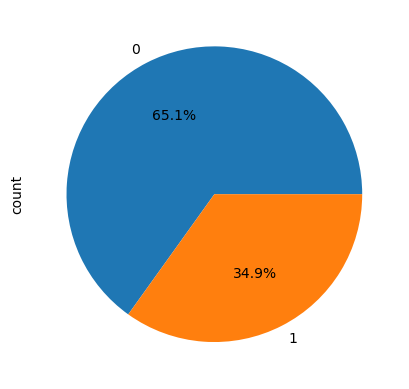

In [161]:
df['Outcome'].value_counts().plot(kind='pie',autopct='%0.01f%%')

<Axes: xlabel='Outcome', ylabel='count'>

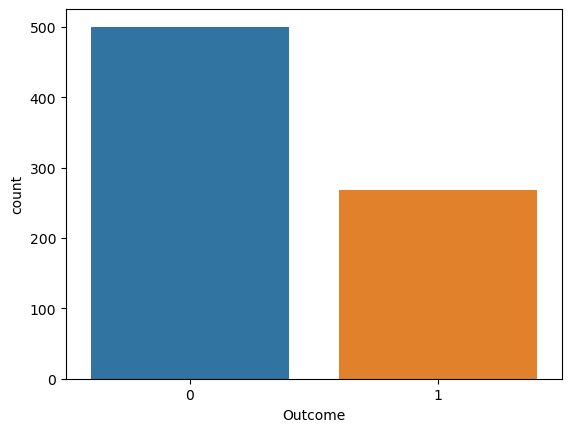

In [72]:
sns.countplot(data=df,x='Outcome')

<Axes: xlabel='Outcome'>

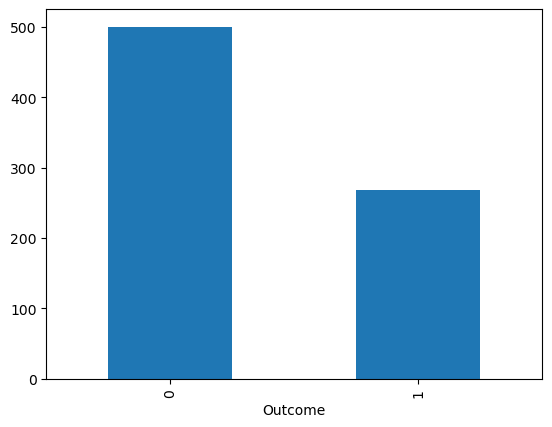

In [73]:
df['Outcome'].value_counts().plot(kind='bar')

<Axes: xlabel='Pregnancies', ylabel='Count'>

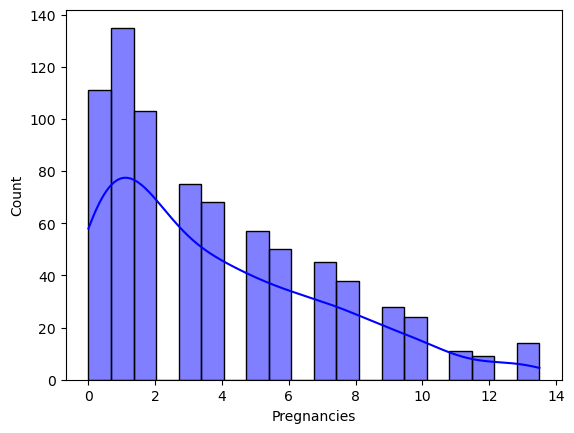

In [162]:
sns.histplot(df['Pregnancies'], kde=True, bins=20, color="blue")

<Axes: xlabel='Glucose', ylabel='Count'>

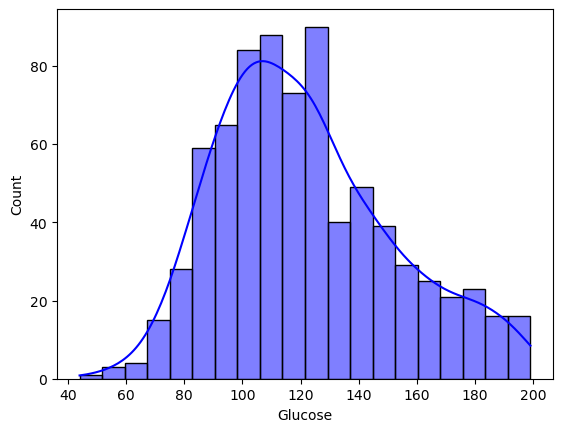

In [163]:
sns.histplot(df['Glucose'], kde=True, bins=20, color="blue")

<Axes: xlabel='BloodPressure', ylabel='Count'>

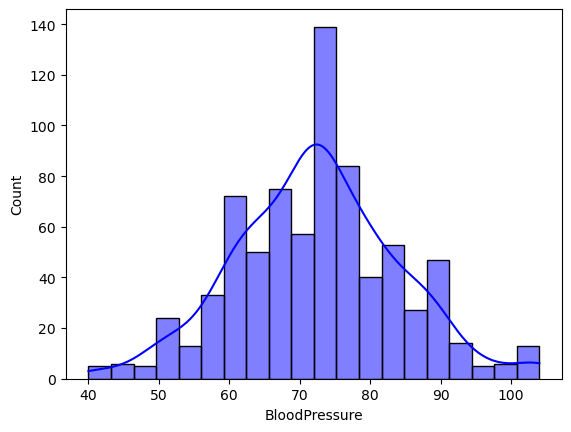

In [164]:
sns.histplot(df['BloodPressure'], kde=True, bins=20, color="blue")

<Axes: xlabel='SkinThickness', ylabel='Count'>

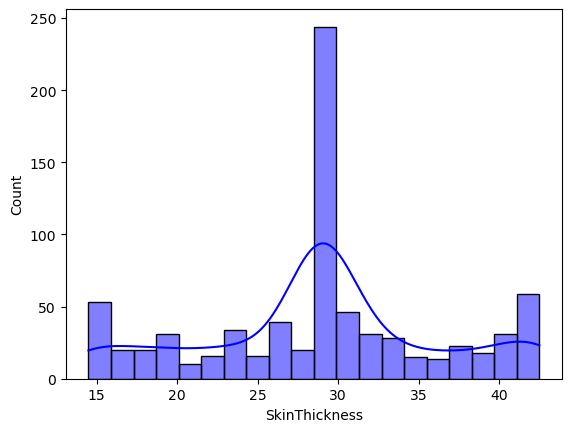

In [165]:
sns.histplot(df['SkinThickness'], kde=True, bins=20, color="blue")

<Axes: xlabel='Insulin', ylabel='Count'>

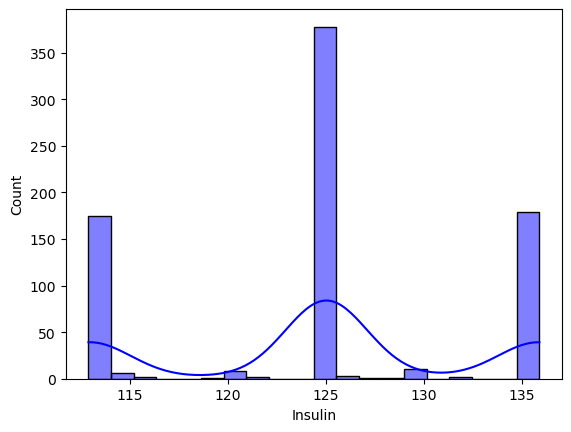

In [166]:
sns.histplot(df['Insulin'], kde=True, bins=20, color="blue")

<Axes: xlabel='BMI', ylabel='Count'>

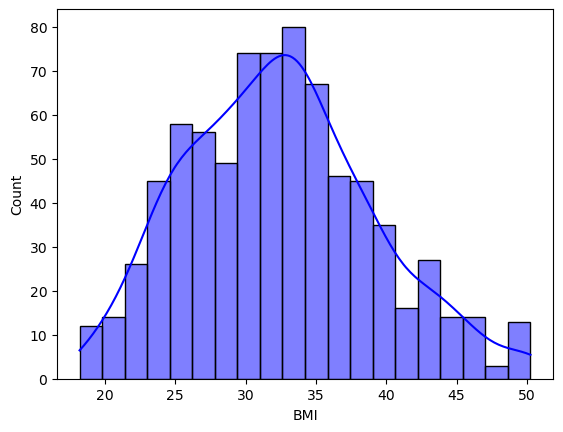

In [167]:
sns.histplot(df['BMI'], kde=True, bins=20, color="blue")

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

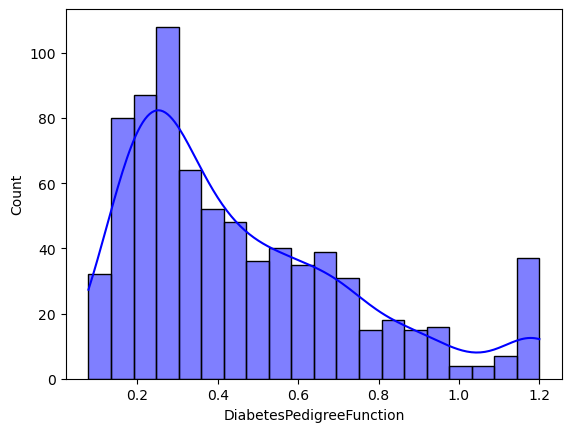

In [168]:
sns.histplot(df['DiabetesPedigreeFunction'], kde=True, bins=20, color="blue")

<Axes: xlabel='Age', ylabel='Count'>

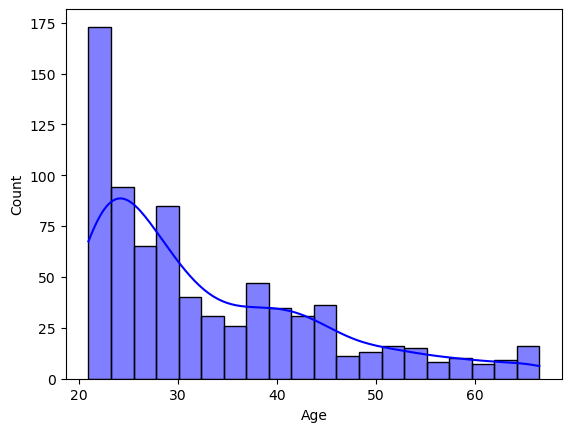

In [169]:
sns.histplot(df['Age'], kde=True, bins=20, color="blue")

In [82]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

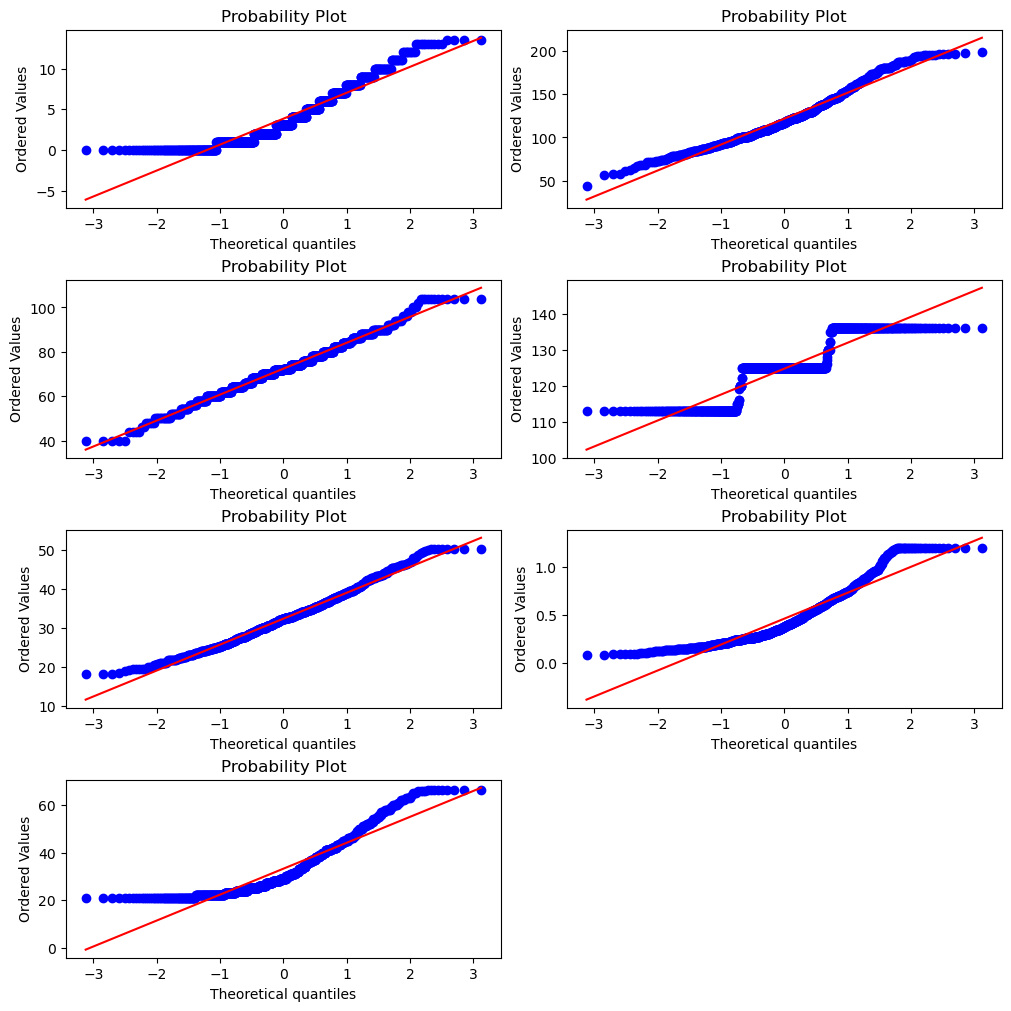

In [170]:
# Q-Q plot
plt.figure(figsize=(10, 10),constrained_layout=True)
plt.subplot(4,2,1)
stats.probplot(df['Pregnancies'], dist="norm", plot=plt)
plt.subplot(4,2,2)
stats.probplot(df['Glucose'], dist="norm", plot=plt)
plt.subplot(4,2,3)
stats.probplot(df['BloodPressure'], dist="norm", plot=plt)
plt.subplot(4,2,4)
stats.probplot(df['Insulin'], dist="norm", plot=plt)
plt.subplot(4,2,5)
stats.probplot(df['BMI'], dist="norm", plot=plt)
plt.subplot(4,2,6)
stats.probplot(df['DiabetesPedigreeFunction'], dist="norm", plot=plt)
plt.subplot(4,2,7)
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.show()

## checking bivariate analysis:

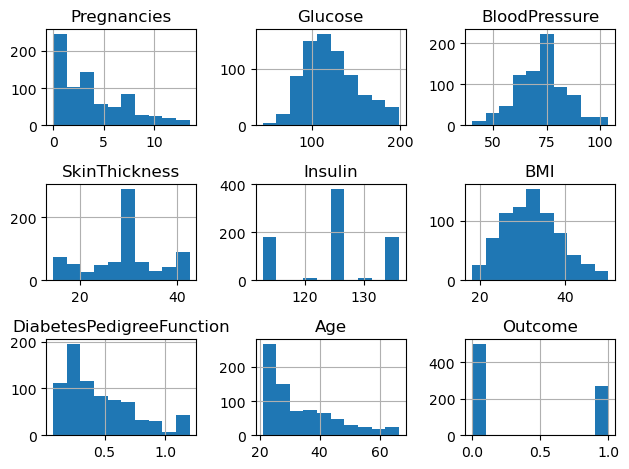

In [16]:
df.hist()
plt.tight_layout()

<Axes: >

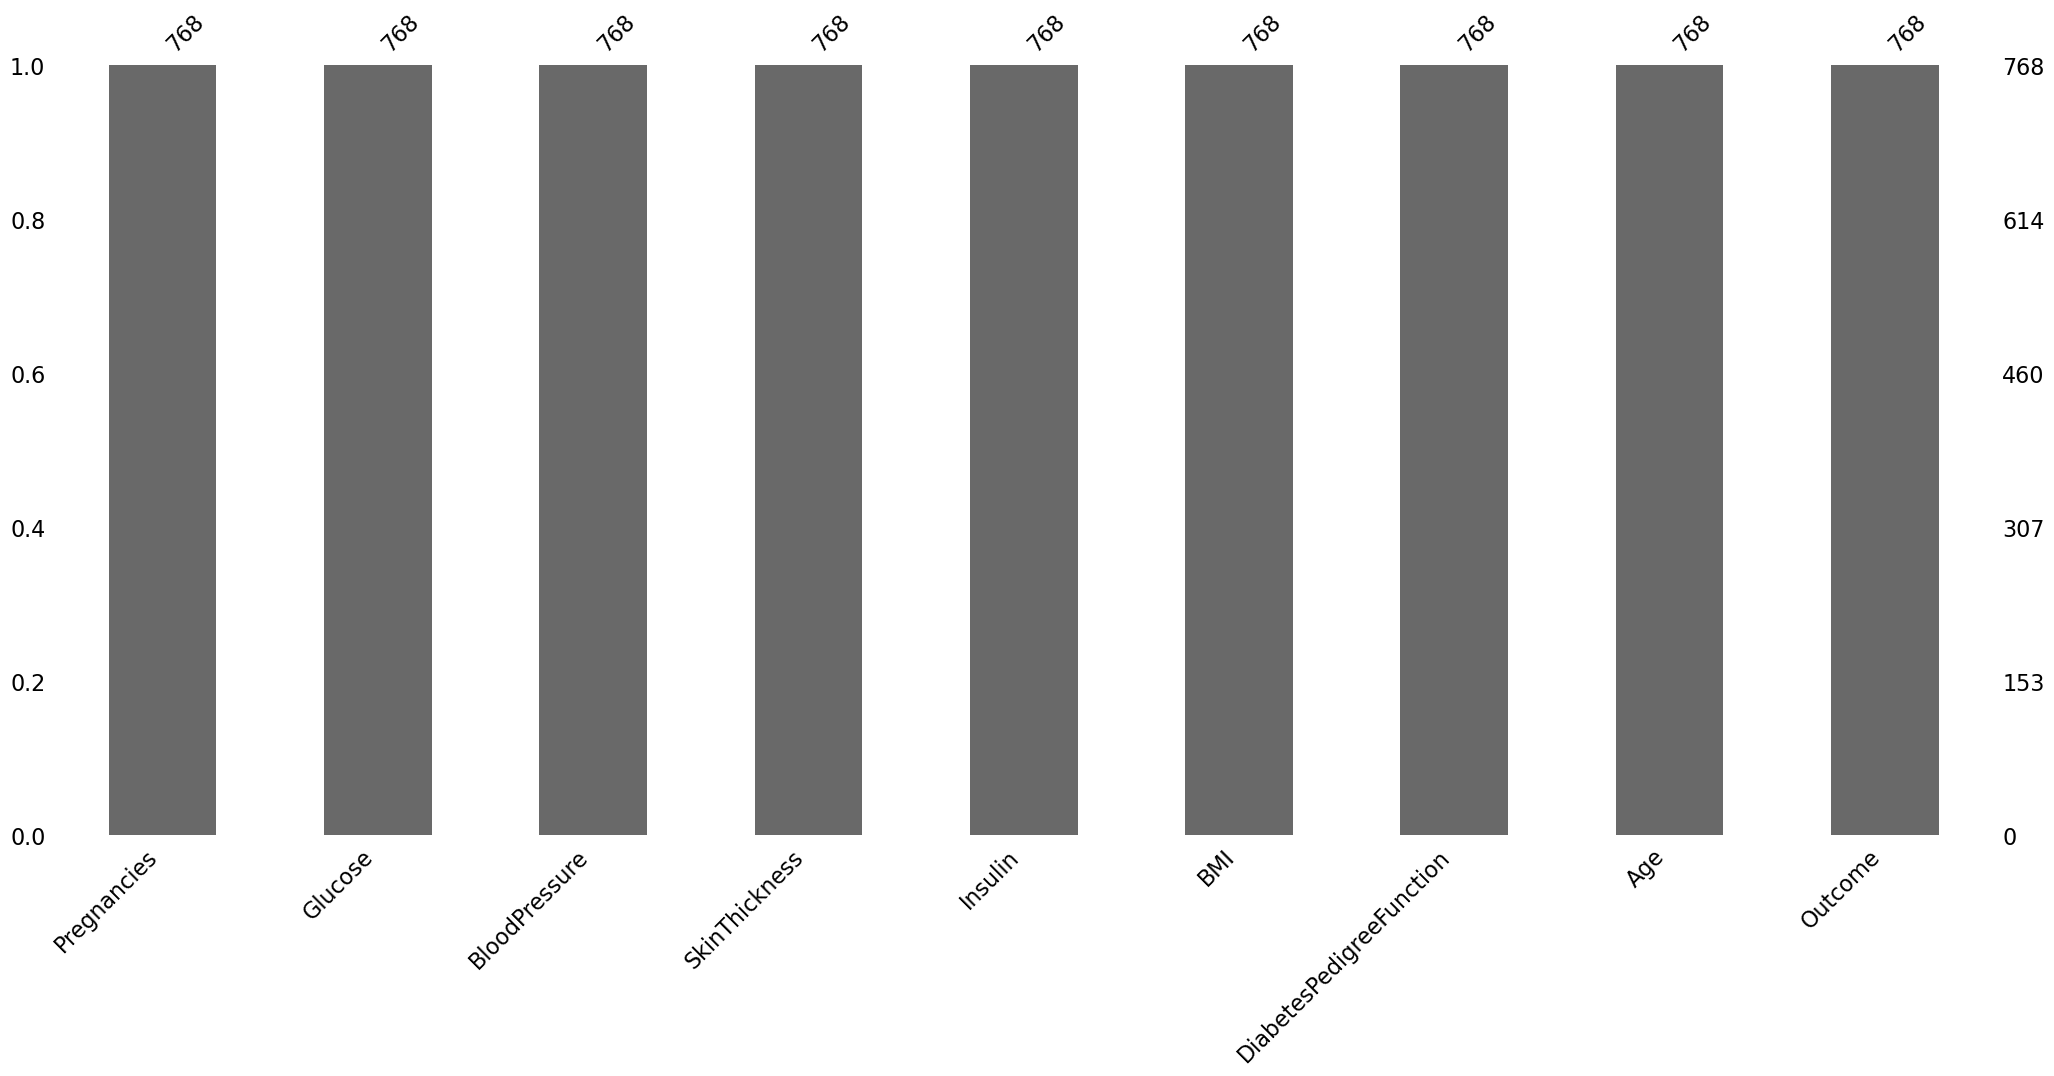

In [85]:
msno.bar(df)

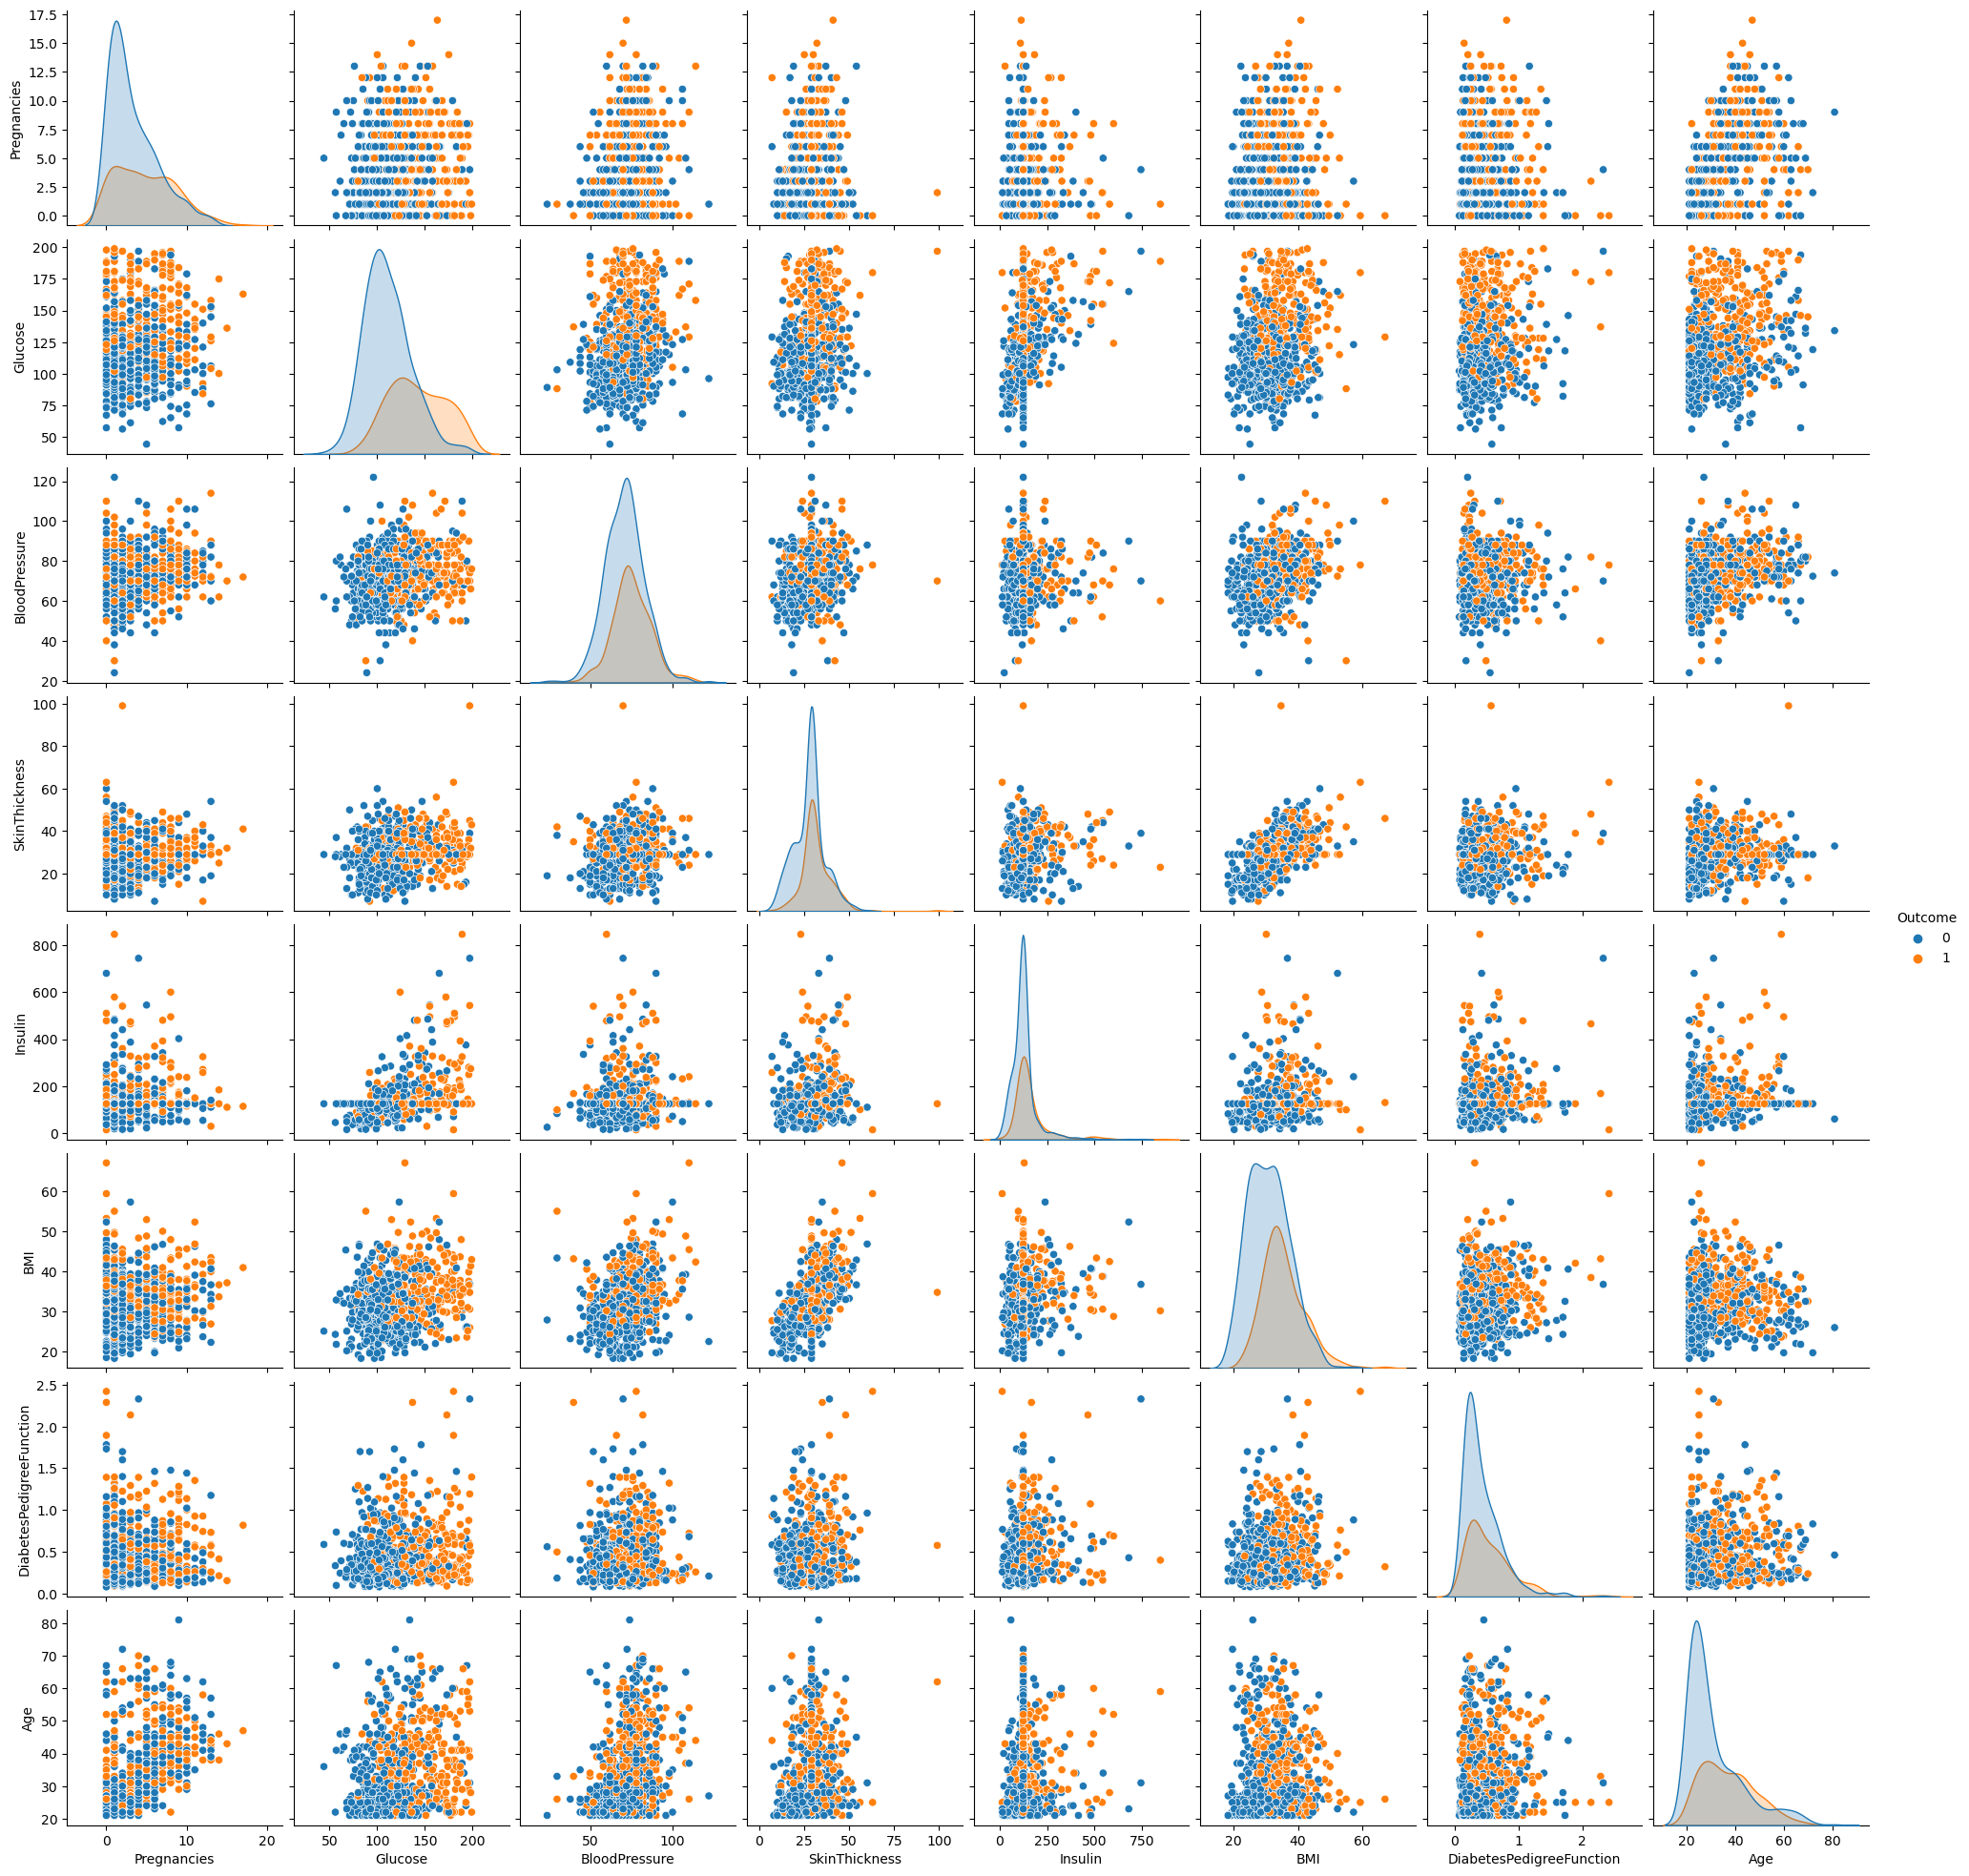

In [86]:
sns.pairplot(df,hue='Outcome')

# checking the correlation:

In [87]:
cor=df.corr()
print(cor)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.127911       0.208522       0.081770   
Glucose                      0.127911  1.000000       0.218367       0.192686   
BloodPressure                0.208522  0.218367       1.000000       0.191853   
SkinThickness                0.081770  0.192686       0.191853       1.000000   
Insulin                      0.025047  0.419064       0.045087       0.155610   
BMI                          0.021565  0.230941       0.281268       0.543162   
DiabetesPedigreeFunction    -0.033523  0.137060      -0.002763       0.102188   
Age                          0.544341  0.266534       0.324595       0.126107   
Outcome                      0.221898  0.492928       0.166074       0.214873   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.025047  0.021565                 -0.033523   
Glucose                   0.419064  0.230

<Axes: >

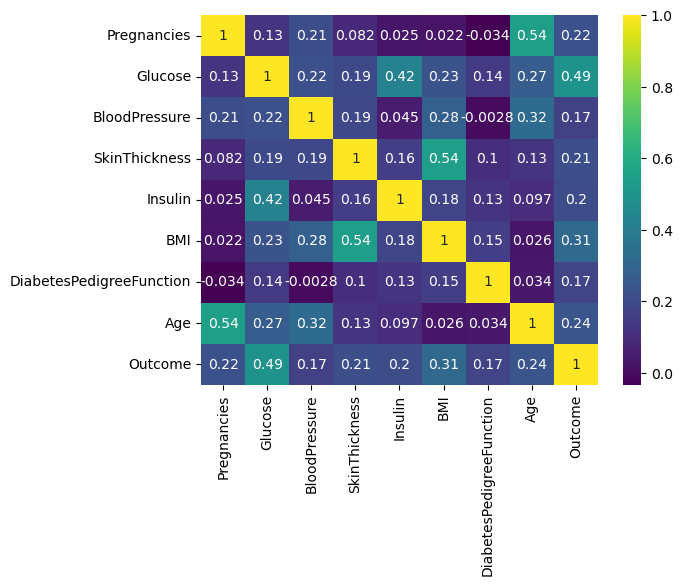

In [88]:
sns.heatmap(cor,annot=True,cmap='viridis')

Points observed:
Correlation must be between -1 to 1.
Glucose (0.492928) has the highest correlation with Outcome, meaning higher glucose levels are strongly linked to diabetes.
Pregnancies (0.221898) and Age (0.238356) also show a notable correlation with Outcome.
BMI (0.311924) is moderately correlated with diabetes risk.
SkinThickness and Insulin have some correlation, suggesting a relationship between body fat and insulin levels.
-------------------
Negative Correlation:
DiabetesPedigreeFunction (-0.033) & Pregnancies
This weak negative correlation suggests that having a higher Diabetes Pedigree Function (a genetic factor) does not strongly relate to the number of pregnancies.
However, since the value is very close to 0, it means there is almost no relationship between these two variables.

# Build the model:

In [20]:
X = df.drop(columns=['Outcome'])
y=df['Outcome']

In [21]:
print(X.shape)
print(y.shape)

(768, 8)
(768,)


In [22]:
# split the dataset:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
scaler=StandardScaler()
X_train_=scaler.fit_transform(X_train)
X_test_=scaler.transform(X_test)

In [95]:
# logistic regression:

In [24]:
models=LogisticRegression()
models.fit(X_train_,y_train)
y_lg_pred=models.predict(X_test_)
print("Accuracy score is",accuracy_score(y_lg_pred,y_test))
print("Recall score is",recall_score(y_lg_pred,y_test))
print("F1 score is",f1_score(y_lg_pred,y_test))
print("confusion matrix is \n",confusion_matrix(y_lg_pred,y_test))
print("Classification report is \n",classification_report(y_lg_pred,y_test))

Accuracy score is 0.7467532467532467
Recall score is 0.6481481481481481
F1 score is 0.6422018348623852
confusion matrix is 
 [[80 20]
 [19 35]]
Classification report is 
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       100
           1       0.64      0.65      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [34]:
result=pd.DataFrame({'actual_result':y_test,'predicted_result':y_lg_pred})
result

,actual_result,predicted_result
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
355,1,1
534,0,0
344,0,0
296,1,0


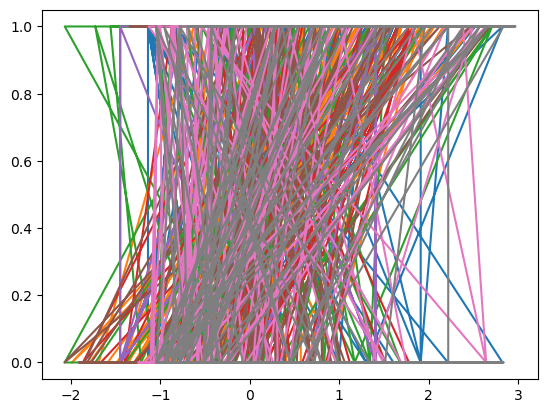

In [51]:
plt.plot(X_test_,y_lg_pred)

In [97]:
# decision tree:

In [176]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_dt_pred=dt.predict(X_test)
print("Accuracy score is",accuracy_score(y_dt_pred,y_test))
print("Recall score is",recall_score(y_dt_pred,y_test))
print("F1 score is",f1_score(y_dt_pred,y_test))
print("confusion matrix is \n",confusion_matrix(y_dt_pred,y_test))
print("Classification report is \n",classification_report(y_dt_pred,y_test))

Accuracy score is 0.7337662337662337
Recall score is 0.625
F1 score is 0.6306306306306306
confusion matrix is 
 [[78 20]
 [21 35]]
Classification report is 
               precision    recall  f1-score   support

           0       0.79      0.80      0.79        98
           1       0.64      0.62      0.63        56

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



In [177]:
# Randomforest:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_rf_pred=rf.predict(X_test)
print("Accuracy score is",accuracy_score(y_rf_pred,y_test))
print("Recall score is",recall_score(y_rf_pred,y_test))
print("F1 score is",f1_score(y_rf_pred,y_test))
print("confusion matrix is \n",confusion_matrix(y_rf_pred,y_test))
print("Classification report is \n",classification_report(y_rf_pred,y_test))

Accuracy score is 0.7337662337662337
Recall score is 0.6166666666666667
F1 score is 0.6434782608695652
confusion matrix is 
 [[76 18]
 [23 37]]
Classification report is 
               precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.67      0.62      0.64        60

    accuracy                           0.73       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.73      0.73      0.73       154



In [178]:
# XGBboost:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_xgb_pred=xgb.predict(X_test)
print("Accuracy score is",accuracy_score(y_xgb_pred,y_test))
print("Recall score is",recall_score(y_xgb_pred,y_test))
print("F1 score is",f1_score(y_xgb_pred,y_test))
print("confusion matrix is \n",confusion_matrix(y_xgb_pred,y_test))
print("Classification report is \n",classification_report(y_xgb_pred,y_test))

Accuracy score is 0.7337662337662337
Recall score is 0.6129032258064516
F1 score is 0.6495726495726496
confusion matrix is 
 [[75 17]
 [24 38]]
Classification report is 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        92
           1       0.69      0.61      0.65        62

    accuracy                           0.73       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.73      0.73      0.73       154



In [179]:
# KNN:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_knn_pred=knn.predict(X_test)
print("Accuracy score is",accuracy_score(y_knn_pred,y_test))
print("Recall score is",recall_score(y_knn_pred,y_test))
print("F1 score is",f1_score(y_knn_pred,y_test))
print("confusion matrix is \n",confusion_matrix(y_knn_pred,y_test))
print("Classification report is \n",classification_report(y_knn_pred,y_test))

Accuracy score is 0.6948051948051948
Recall score is 0.5625
F1 score is 0.6050420168067226
confusion matrix is 
 [[71 19]
 [28 36]]
Classification report is 
               precision    recall  f1-score   support

           0       0.72      0.79      0.75        90
           1       0.65      0.56      0.61        64

    accuracy                           0.69       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.69      0.69      0.69       154



In [180]:
# SVM:
svm=SVC()
svm.fit(X_train,y_train)
y_svm_pred=svm.predict(X_test)
print("Accuracy score is",accuracy_score(y_svm_pred,y_test))
print("Recall score is",recall_score(y_svm_pred,y_test))
print("F1 score is",f1_score(y_svm_pred,y_test))
print("confusion matrix is \n",confusion_matrix(y_svm_pred,y_test))
print("Classification report is \n",classification_report(y_svm_pred,y_test))

Accuracy score is 0.7662337662337663
Recall score is 0.6792452830188679
F1 score is 0.6666666666666666
confusion matrix is 
 [[82 19]
 [17 36]]
Classification report is 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       101
           1       0.65      0.68      0.67        53

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.74       154
weighted avg       0.77      0.77      0.77       154



In [181]:
# List of models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}

# Store results
results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results
    results.append({"Model": name, "Accuracy": accuracy, "Recall": recall, "F1 Score": f1})

# Convert results to DataFrame
df_results = pd.DataFrame(results)

# Display the comparison table
print(df_results)

                 Model  Accuracy    Recall  F1 Score
0  Logistic Regression  0.746753  0.636364  0.642202
1        Decision Tree  0.727273  0.636364  0.625000
2        Random Forest  0.772727  0.690909  0.684685
3              XGBoost  0.733766  0.690909  0.649573
4                  KNN  0.694805  0.654545  0.605042
5                  SVM  0.766234  0.654545  0.666667


In [104]:
df_results

,Model,Accuracy,Recall,F1 Score
0,Logistic Regression,0.753247,0.618182,0.641509
1,Decision Tree,0.714286,0.636364,0.614035
2,Random Forest,0.740260,0.654545,0.642857
3,XGBoost,0.746753,0.745455,0.677686
4,KNN,0.727273,0.690909,0.644068
5,SVM,0.746753,0.581818,0.621359


In [105]:
# from the above results: we can say that randomforest classifier has higher accuracy than other models used:

In [ ]:
# Lets apply Cross validation score, Grid search cv and Randomized search cv:

In [182]:
# cross validation score:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}
def modelcomparison():
    for name,mod in models.items():
        mod.fit(X_train,y_train)
        pred=mod.predict(X_test)
        accuracy=accuracy_score(pred,y_test)
        print("Accuracy score of ",mod,"=",accuracy)

In [183]:
modelcomparison()

Accuracy score of  LogisticRegression() = 0.7467532467532467
Accuracy score of  DecisionTreeClassifier() = 0.7272727272727273
Accuracy score of  RandomForestClassifier() = 0.7727272727272727
Accuracy score of  KNeighborsClassifier() = 0.6948051948051948
Accuracy score of  SVC() = 0.7662337662337663


In [184]:
# now we apply cross validation score:
modelss = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()
}
def modelcomparison_cross_val_score():
    for name,mod in modelss.items():
        cv_score=cross_val_score(mod,X,y,cv=5)
        print(mod,cv_score)

In [185]:
modelcomparison_cross_val_score()

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression() [0.75974026 0.73376623 0.79220779 0.78431373 0.77777778]
DecisionTreeClassifier() [0.72727273 0.66883117 0.63636364 0.75816993 0.73202614]
RandomForestClassifier() [0.74025974 0.72727273 0.75324675 0.82352941 0.74509804]
KNeighborsClassifier() [0.73376623 0.70779221 0.74025974 0.79084967 0.73856209]
SVC() [0.75974026 0.72077922 0.77272727 0.78431373 0.77124183]


In [138]:
# hyperparameter tunning: 

In [141]:
# let use this in only one model:
modl=SVC()
parameters={
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[1,5,10,20]
}
gsc=GridSearchCV(modl,parameters,cv=5)
gsc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 20],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [142]:
gsc.cv_results_

{'mean_fit_time': array([0.02612934, 0.01898932, 0.01842384, 0.0162787 , 0.04290562,
        0.0257875 , 0.02170639, 0.01716003, 0.06167064, 0.03932085,
        0.02364078, 0.01198592, 0.10481911, 0.05888753, 0.03309531,
        0.01173482]),
 'std_fit_time': array([0.01514292, 0.00174043, 0.00085008, 0.00045865, 0.01140934,
        0.00248018, 0.00235241, 0.00996568, 0.01000441, 0.00823203,
        0.00252184, 0.00110423, 0.01975292, 0.01021606, 0.01349363,
        0.00089158]),
 'mean_score_time': array([0.00444231, 0.00421171, 0.00846224, 0.00550518, 0.00370059,
        0.00940323, 0.0080966 , 0.00383339, 0.00325747, 0.00439105,
        0.00805221, 0.00347133, 0.00364523, 0.00323863, 0.00661588,
        0.00333061]),
 'std_score_time': array([0.00078556, 0.00038774, 0.00113029, 0.00133971, 0.00039812,
        0.00996771, 0.00084607, 0.00041593, 0.00039889, 0.00081906,
        0.00138536, 0.00045157, 0.00060799, 0.0003866 , 0.00078308,
        0.00041522]),
 'param_C': masked_array(d

In [143]:
gsc.best_params_

{'C': 1, 'kernel': 'linear'}

In [144]:
gsc.param_grid

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [1, 5, 10, 20]}

In [145]:
gsc.best_score_

0.7671064907370386

In [146]:
# Randomized cv:
modl=SVC()
parameters={
    'kernel':['linear','poly','rbf','sigmoid'],
    'C':[1,5,10,20]
}
rsv=RandomizedSearchCV(modl,parameters,cv=5)
rsv.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [1, 5, 10, 20],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']})

In [147]:
rsv.best_estimator_

SVC(C=1, kernel='linear')

In [148]:
rsv.best_params_

{'kernel': 'linear', 'C': 1}

In [149]:
rsv.best_score_

0.7671064907370386

In [233]:
df_scaled = pd.DataFrame(X_train_)

Text(0.5, 1.0, 'Boxplot of Scaled Features')

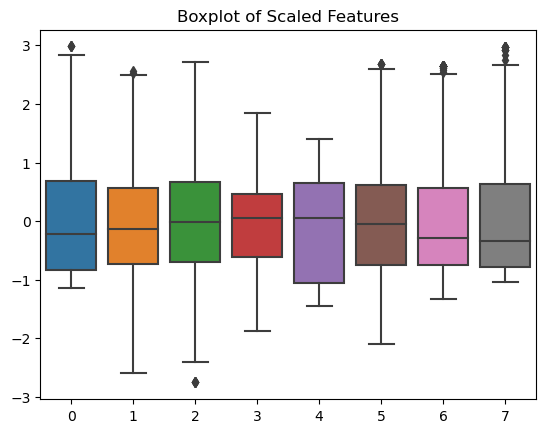

In [234]:
sns.boxplot(data=df_scaled)
plt.title("Boxplot of Scaled Features")

In [226]:
prediction=models.predict(scaler.transform([[6,148,72,35,0,33.6,0.627,50]]))

In [227]:
if prediction == 1:
    print("You are suffering from diabetes")
else:
    print("You are in a normal mood")

You are suffering from diabetes


In [150]:
# Saving our model by using two methods:
# joblib
# pickle

In [229]:
import pickle

In [230]:
with open('mod_pkles','wb')as f:
    pickle.dump(model,f)

In [153]:
with open('mod_pkle','rb') as f:
    mod=pickle.load(f)

In [154]:
# mod.predict()

In [231]:
import joblib

In [232]:
joblib.dump(model,'modll_job')

['modll_job']

In [157]:
joblib.load('modl_job')

'Logistic Regression'